In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import matplotlib.pyplot as plt
from utils import *

In [2]:
# determine how many samples of each ancestry group
groupscsv = "../datasets/SraRunTableD1.txt"
goldstandard = "../datasets/1_gs.csv"
gs = pd.read_csv(goldstandard)
groups = pd.read_csv(groupscsv)

for group, df_by_group in groups.groupby('Population'):
    accession_numbers = df_by_group['Run'].values.tolist()
    gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
    print(len(gs_final))


95
114
111
103
67


In [3]:
dataI = list()
dataII = list()

tools =["optitype","rna2hla","arcas","seq2hla","hlahd","phlat","hlaforest","hlavbseq",'hlaminer']

groupscsv = "../datasets/SraRunTableD1.txt"
groups = pd.read_csv(groupscsv)


for t in tools:
    toolresult = []
    
        
    gs=pd.read_csv("../datasets/1_gs.csv")
    pre=pd.read_csv("../results/standard/"+str(t)+"_d1.csv")

    for group, df_by_group in groups.groupby('Population'):
        accession_numbers = df_by_group['Run'].values.tolist()
        gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
        ret = np.array( compute_matches(pre,gs_final) )
        toolresult.append(ret)


    europe = np.array( sum_euro_groups(toolresult[0:4]) )
    yoruba = np.array( toolresult[4] )
    dataI.append([t, europe[:,0], yoruba[:,0]])
    dataII.append([t, europe[:,1], yoruba[:,1]])

    
    
dfI = pd.DataFrame(dataI,columns=['tool','europe','yoruba'])
dfII = pd.DataFrame(dataII,columns=['tool','europe','yoruba'])
print(dfI)
print(dfII)

        tool            europe         yoruba
0   optitype    [10, 20, 2502]    [0, 8, 390]
1    rna2hla    [30, 62, 2414]   [4, 19, 365]
2      arcas    [33, 77, 2350]   [2, 21, 361]
3    seq2hla    [30, 62, 2414]   [4, 19, 365]
4      hlahd   [149, 66, 2305]  [16, 17, 353]
5      phlat   [55, 137, 2220]  [13, 20, 309]
6  hlaforest   [53, 300, 1973]  [33, 38, 291]
7   hlavbseq  [237, 112, 2087]  [41, 24, 285]
8   hlaminer  [1880, 193, 145]  [327, 26, 15]
        tool            europe         yoruba
0   optitype         [0, 0, 0]      [0, 0, 0]
1    rna2hla     [36, 28, 782]    [9, 5, 116]
2      arcas     [2, 53, 1601]   [4, 46, 200]
3    seq2hla   [88, 168, 1430]  [23, 18, 219]
4      hlahd   [101, 26, 1559]  [12, 32, 202]
5      phlat   [118, 51, 1001]  [43, 38, 141]
6  hlaforest   [28, 147, 1503]   [8, 54, 160]
7   hlavbseq    [1619, 25, 40]   [248, 2, 10]
8   hlaminer  [1031, 235, 146]  [176, 25, 19]


In [7]:
# Class I pvalues


# new method - chi square test of independence

data = np.array(dataI)
pvaluesI = []

for tool in data:
    etotal = sum(tool[1])
    ytotal = sum(tool[2])
    
    print(tool[0])
    
    # 2 digit 
    obs = [ [tool[1][1]+tool[1][2],tool[1][0]] , [tool[2][1]+tool[2][2],tool[2][0]] ]
    print("\t2 dig table:" , obs , "end")

    
    res = chi2_contingency(obs)
    print("\t2 dig p value:", res[1])
    # print([e2dig_obs, y2dig_obs])
    
    # 2 digit 
    e4dig_obs = [tool[1][2],tool[1][1]+tool[1][0]]
    y4dig_obs = [tool[2][2],tool[2][1]+tool[2][0]]

    
    res4 = chi2_contingency([e4dig_obs, y4dig_obs])
    print("\t4 dig table:" , [e4dig_obs, y4dig_obs] , "end")
    print("\t4 dig p value:", res4[1])
    
    pvaluesI.append([res[1],res4[1]])
    

    # print("\ntool: " ,tool[0] , "\n table", [e4dig_obs, y4dig_obs], "\n 4dig" , res4.pvalue)

    


optitype
	2 dig table: [[2522, 10], [398, 0]] end
	2 dig p value: 0.4274226627380222
	4 dig table: [[2502, 30], [390, 8]] end
	4 dig p value: 0.26512704988009617
rna2hla
	2 dig table: [[2476, 30], [384, 4]] end
	2 dig p value: 0.9764123929181595
	4 dig table: [[2414, 92], [365, 23]] end
	4 dig p value: 0.04794344956204336
arcas
	2 dig table: [[2427, 33], [382, 2]] end
	2 dig p value: 0.26798777105335186
	4 dig table: [[2350, 110], [361, 23]] end
	4 dig p value: 0.23783345759923225
seq2hla
	2 dig table: [[2476, 30], [384, 4]] end
	2 dig p value: 0.9764123929181595
	4 dig table: [[2414, 92], [365, 23]] end
	4 dig p value: 0.04794344956204336
hlahd
	2 dig table: [[2371, 149], [370, 16]] end
	2 dig p value: 0.20077348238479858
	4 dig table: [[2305, 215], [353, 33]] end
	4 dig p value: 1.0
phlat
	2 dig table: [[2357, 55], [329, 13]] end
	2 dig p value: 0.13103442262376053
	4 dig table: [[2220, 192], [309, 33]] end
	4 dig p value: 0.3362095680520253
hlaforest
	2 dig table: [[2273, 53], [329,

/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/101263778.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(dataI)


In [8]:
# Class I pvalues


# new method - chi square test of independence

data = np.array(dataII)
pvaluesII = []

for tool in data:
    etotal = sum(tool[1])
    ytotal = sum(tool[2])
    
    print(tool[0])
    
    # 2 digit 
    obs = [ [tool[1][1]+tool[1][2],tool[1][0]] , [tool[2][1]+tool[2][2],tool[2][0]] ]
    print("\t2 dig table:" , obs , "end")

    
    res = chi2_contingency(obs)
    print("\t2 dig p value:", res[1])
    # print([e2dig_obs, y2dig_obs])
    
    # 2 digit 
    e4dig_obs = [tool[1][2],tool[1][1]+tool[1][0]]
    y4dig_obs = [tool[2][2],tool[2][1]+tool[2][0]]

    
    res4 = chi2_contingency([e4dig_obs, y4dig_obs])
    print("\t4 dig table:" , [e4dig_obs, y4dig_obs] , "end")
    print("\t4 dig p value:", res4[1])
    
    pvaluesII.append([res[1],res4[1]])
    

    # print("\ntool: " ,tool[0] , "\n table", [e4dig_obs, y4dig_obs], "\n 4dig" , res4.pvalue)

    


optitype
	2 dig table: [[0, 0], [0, 0]] end
	2 dig p value: nan
	4 dig table: [[0, 0], [0, 0]] end
	4 dig p value: nan
rna2hla
	2 dig table: [[810, 36], [121, 9]] end
	2 dig p value: 0.26026976107225197
	4 dig table: [[782, 64], [116, 14]] end
	4 dig p value: 0.27985361738592696
arcas
	2 dig table: [[1654, 2], [246, 4]] end
	2 dig p value: 0.0010157780521511132
	4 dig table: [[1601, 55], [200, 50]] end
	4 dig p value: 2.2748590592075775e-26
seq2hla
	2 dig table: [[1598, 88], [237, 23]] end
	2 dig p value: 0.02756748646757339
	4 dig table: [[1430, 256], [219, 41]] end
	4 dig p value: 0.8794517662103097
hlahd
	2 dig table: [[1585, 101], [234, 12]] end
	2 dig p value: 0.5828890713151362
	4 dig table: [[1559, 127], [202, 44]] end
	4 dig p value: 1.7822723347217208e-07
phlat
	2 dig table: [[1052, 118], [179, 43]] end
	2 dig p value: 0.00011770246539411351
	4 dig table: [[1001, 169], [141, 81]] end
	4 dig p value: 9.287742896876756e-15
hlaforest
	2 dig table: [[1650, 28], [214, 8]] end
	2 di

/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/3431338050.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(dataII)
/Users/dottieyu/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/contingency.py:128: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


         tool                  ancestry  accuracy
0    optitype  europe four dig accuracy  0.988152
1     rna2hla  europe four dig accuracy  0.963288
2       arcas  europe four dig accuracy  0.955285
3     seq2hla  europe four dig accuracy  0.963288
4       hlahd  europe four dig accuracy  0.914683
5       phlat  europe four dig accuracy  0.920398
6   hlaforest  europe four dig accuracy  0.848237
7    hlavbseq  europe four dig accuracy  0.856732
8    hlaminer  europe four dig accuracy  0.065374
9    optitype  yoruba four dig accuracy  0.979899
10    rna2hla  yoruba four dig accuracy  0.940722
11      arcas  yoruba four dig accuracy  0.940104
12    seq2hla  yoruba four dig accuracy  0.940722
13      hlahd  yoruba four dig accuracy  0.914508
14      phlat  yoruba four dig accuracy  0.903509
15  hlaforest  yoruba four dig accuracy  0.803867
16   hlavbseq  yoruba four dig accuracy  0.814286
17   hlaminer  yoruba four dig accuracy  0.040761


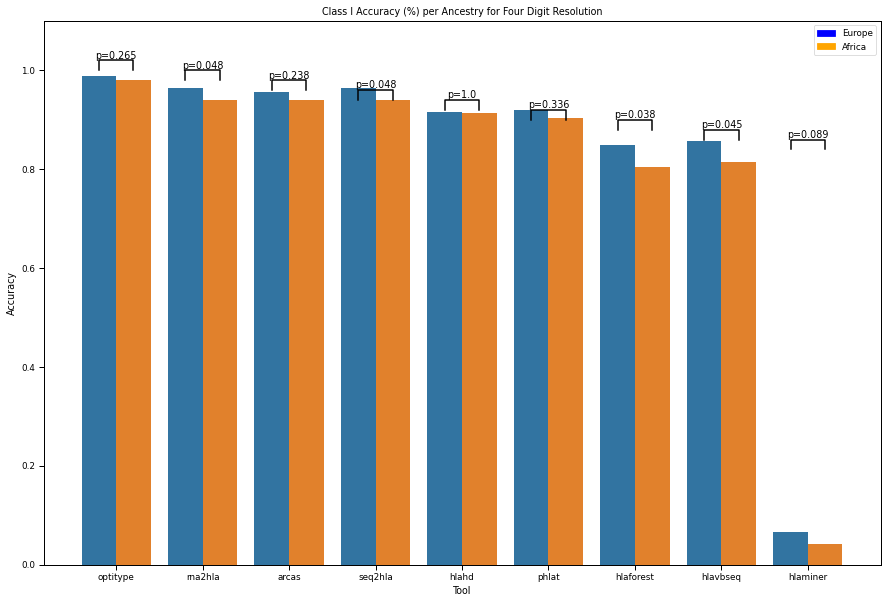

In [9]:
# 4 dig accuracy, Class I

# calculating accuracy, creating data frames
europe = np.array( dfI['europe'].values.tolist() )
total = np.sum(europe,axis=1)
europe_4dig = (europe[:,2])/total
europe_2dig = (europe[:,1]+europe[:,2])/total

yoruba = np.array( dfI['yoruba'].values.tolist() )
total = np.sum(yoruba,axis=1)
yoruba_4dig = (yoruba[:,2])/total
yoruba_2dig = (yoruba[:,1]+yoruba[:,2])/total

# concat to df
dfeuro2dig = pd.DataFrame(europe_2dig,columns=['europe two dig accuracy'])
dfeuro4dig = pd.DataFrame(europe_4dig,columns=['europe four dig accuracy'])
dfyoru2dig = pd.DataFrame(yoruba_2dig,columns=['yoruba two dig accuracy'])
dfyoru4dig = pd.DataFrame(yoruba_4dig,columns=['yoruba four dig accuracy'])

df_accuracy=pd.concat([dfI['tool'],dfeuro4dig,dfyoru4dig],axis=1, join='inner')

df_accuracy = pd.melt(df_accuracy, id_vars="tool", var_name="ancestry", value_name="accuracy")
print(df_accuracy)


sns.set_context("paper")
sns.color_palette("pastel")
plt.figure(figsize=(15,10))



ax=sns.barplot(x = 'tool', y = 'accuracy', data=df_accuracy,hue='ancestry',order=tools)

for i in range(9):
    x1, x2 = -0.2+i, 0.2+i 
    y, h, col = 1-i*0.02, 0.02, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, f"p={round(pvaluesI[i][1],3)}", ha='center', va='bottom', color=col)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Tool")
ax.set_title("Class I Accuracy (%) per Ancestry for Four Digit Resolution") 
plt.legend(labels=['Yoruba','Europe'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1.1))
#sns.despine()

colors = {'Europe':'blue', 'Africa':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


plt.show()

#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)

         tool                  ancestry  accuracy
0    optitype  europe four dig accuracy       NaN
1     rna2hla  europe four dig accuracy  0.924350
2       arcas  europe four dig accuracy  0.966787
3     seq2hla  europe four dig accuracy  0.848161
4       hlahd  europe four dig accuracy  0.924674
5       phlat  europe four dig accuracy  0.855556
6   hlaforest  europe four dig accuracy  0.895709
7    hlavbseq  europe four dig accuracy  0.023753
8    hlaminer  europe four dig accuracy  0.103399
9    optitype  yoruba four dig accuracy       NaN
10    rna2hla  yoruba four dig accuracy  0.892308
11      arcas  yoruba four dig accuracy  0.800000
12    seq2hla  yoruba four dig accuracy  0.842308
13      hlahd  yoruba four dig accuracy  0.821138
14      phlat  yoruba four dig accuracy  0.635135
15  hlaforest  yoruba four dig accuracy  0.720721
16   hlavbseq  yoruba four dig accuracy  0.038462
17   hlaminer  yoruba four dig accuracy  0.086364


/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/3927552495.py:6: RuntimeWarning: invalid value encountered in true_divide
  europe_4dig = (europe[:,2])/total
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/3927552495.py:7: RuntimeWarning: invalid value encountered in true_divide
  europe_2dig = (europe[:,1]+europe[:,2])/total
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/3927552495.py:11: RuntimeWarning: invalid value encountered in true_divide
  yoruba_4dig = (yoruba[:,2])/total
/var/folders/j4/pd1pbcl90xz683wfkd2drjqw0000gn/T/ipykernel_63057/3927552495.py:12: RuntimeWarning: invalid value encountered in true_divide
  yoruba_2dig = (yoruba[:,1]+yoruba[:,2])/total


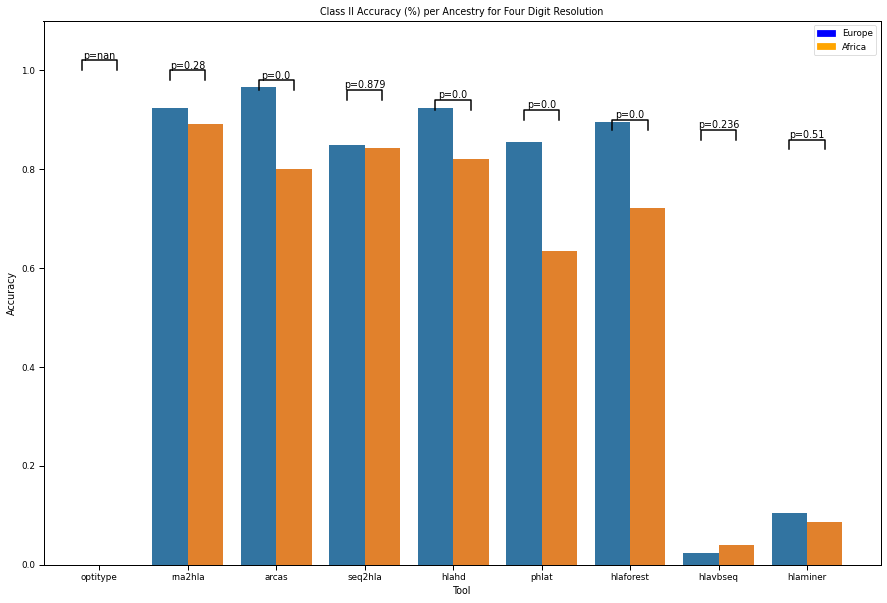

In [10]:
# 4 dig accuracy, Class II

# calculating accuracy, creating data frames
europe = np.array( dfII['europe'].values.tolist() )
total = np.sum(europe,axis=1)
europe_4dig = (europe[:,2])/total
europe_2dig = (europe[:,1]+europe[:,2])/total

yoruba = np.array( dfII['yoruba'].values.tolist() )
total = np.sum(yoruba,axis=1)
yoruba_4dig = (yoruba[:,2])/total
yoruba_2dig = (yoruba[:,1]+yoruba[:,2])/total

# concat to df
dfeuro2dig = pd.DataFrame(europe_2dig,columns=['europe two dig accuracy'])
dfeuro4dig = pd.DataFrame(europe_4dig,columns=['europe four dig accuracy'])
dfyoru2dig = pd.DataFrame(yoruba_2dig,columns=['yoruba two dig accuracy'])
dfyoru4dig = pd.DataFrame(yoruba_4dig,columns=['yoruba four dig accuracy'])

df_accuracy=pd.concat([dfII['tool'],dfeuro4dig,dfyoru4dig],axis=1, join='inner')

df_accuracy = pd.melt(df_accuracy, id_vars="tool", var_name="ancestry", value_name="accuracy")
print(df_accuracy)


sns.set_context("paper")
sns.color_palette("pastel")
plt.figure(figsize=(15,10))



ax=sns.barplot(x = 'tool', y = 'accuracy', data=df_accuracy,hue='ancestry',order=tools)

for i in range(9):
    x1, x2 = -0.2+i, 0.2+i 
    y, h, col = 1-i*0.02, 0.02, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, f"p={round(pvaluesII[i][1],3)}", ha='center', va='bottom', color=col)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Tool")
ax.set_title("Class II Accuracy (%) per Ancestry for Four Digit Resolution") 
plt.legend(labels=['Yoruba','Europe'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((0,1.1))
#sns.despine()

colors = {'Europe':'blue', 'Africa':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)


plt.show()

#plt.savefig('../Figures/read_length_accuracy_4dig.png',bbox_inches ="tight",dpi=300)